In [1]:
from sklearn.datasets import load_breast_cancer


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = load_breast_cancer()


In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:

from sklearn.model_selection import train_test_split, cross_val_score

x = df.drop(['target'], axis=1)
y = df['target']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [8]:
##IMPLEMENTING SOFT AND HARD VOTING

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [9]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True )
rnd_clf2 = RandomForestClassifier(n_estimators = 100)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
for clf in (log_clf, rnd_clf, svm_clf,rnd_clf2):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,"Accuracy Score:", accuracy_score(y_test,y_pred),"F1-Score:",metrics.f1_score(y_test,y_pred))

LogisticRegression Accuracy Score: 0.9736842105263158 F1-Score: 0.980891719745223
RandomForestClassifier Accuracy Score: 0.9736842105263158 F1-Score: 0.9803921568627451
SVC Accuracy Score: 0.9824561403508771 F1-Score: 0.9871794871794872
RandomForestClassifier Accuracy Score: 0.9824561403508771 F1-Score: 0.9871794871794872


In [11]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf)
                 ,('rf', rnd_clf)
                 ,('svc', svm_clf)
                 ,('rf2', rnd_clf2)],
    voting = 'soft')
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True)),
                             ('rf2', RandomForestClassifier())],
                 voting='soft')

In [12]:
y_pred = voting_clf.predict(x_test)

In [13]:
print("Voting Classifier ","Accuracy Score:", accuracy_score(y_test,y_pred),"F1-Score:",metrics.f1_score(y_test,y_pred))

Voting Classifier  Accuracy Score: 0.9736842105263158 F1-Score: 0.9806451612903225


In [14]:
## IMPLEMENTING BAGGING
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    SVC(), n_estimators = 500,
    max_samples = 100, bootstrap = True,
    n_jobs = -1)
bag_clf.fit(x_train,y_train)
y_pred = bag_clf.predict(x_test)

In [15]:
print("Bagging Classifier ","Accuracy Score:", accuracy_score(y_test,y_pred),"F1-Score:",metrics.f1_score(y_test,y_pred))

Bagging Classifier  Accuracy Score: 0.956140350877193 F1-Score: 0.9681528662420382


In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf_2 = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True,
    n_jobs = -1)
bag_clf_2.fit(x_train,y_train)
y_pred = bag_clf_2.predict(x_test)

In [17]:
print("Bagging Classifier (Decision Tree)","Accuracy Score:", accuracy_score(y_test,y_pred),"F1-Score:",metrics.f1_score(y_test,y_pred))

Bagging Classifier (Decision Tree) Accuracy Score: 0.9824561403508771 F1-Score: 0.9870129870129869


In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(), n_estimators = 200,
    algorithm = "SAMME.R", learning_rate = 0.5)

ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5,
                   n_estimators=200)

In [19]:
y_pred = ada_clf.predict(x_test)

In [20]:
print("AdaBoost Classifier","Accuracy Score:", accuracy_score(y_test,y_pred),"F1-Score:",metrics.f1_score(y_test,y_pred))

AdaBoost Classifier Accuracy Score: 0.9035087719298246 F1-Score: 0.9281045751633987


In [32]:
import scikitplot as skplt
import warnings 
warnings.filterwarnings("ignore")

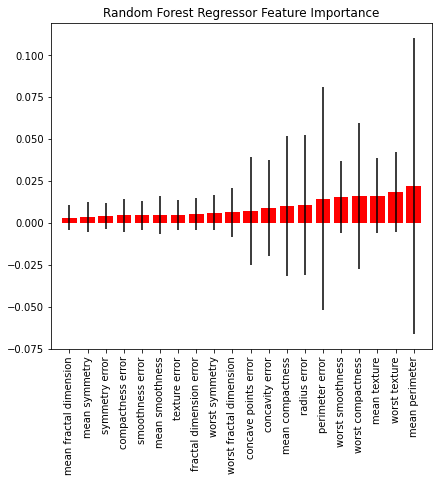

In [34]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(rnd_clf2, feature_names=data.feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

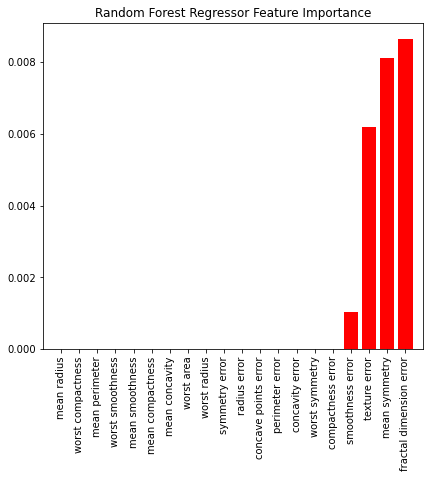

In [56]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(ada_clf, feature_names=data.feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

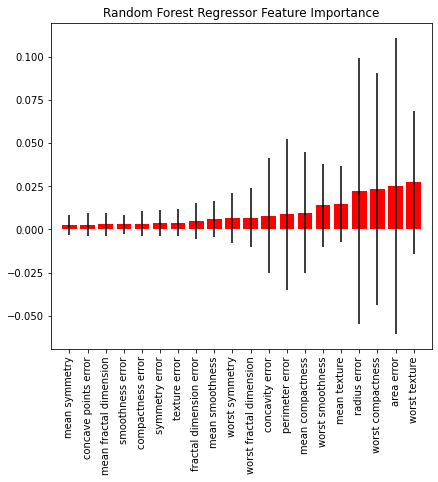

In [59]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(rnd_clf, feature_names=data.feature_names,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

<AxesSubplot:title={'center':'Bag Clf SVC Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

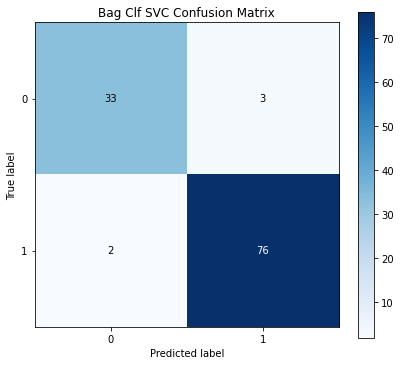

In [68]:
y_pred = bag_clf.predict(x_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Bag Clf SVC Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

<AxesSubplot:title={'center':'Ada Boost Clf Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

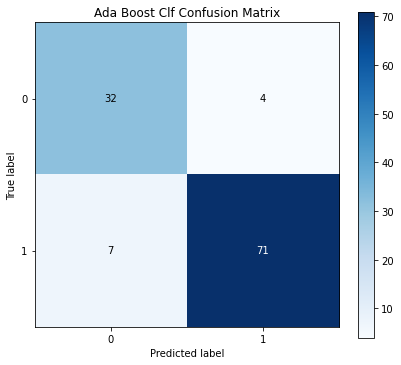

In [69]:
y_pred = ada_clf.predict(x_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Ada Boost Clf Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

<AxesSubplot:title={'center':'Bag Clf Decision Trees Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

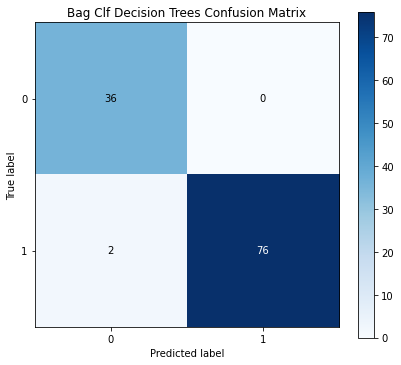

In [70]:
y_pred = bag_clf_2.predict(x_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Bag Clf Decision Trees Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

<AxesSubplot:title={'center':'Logistic Regression Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

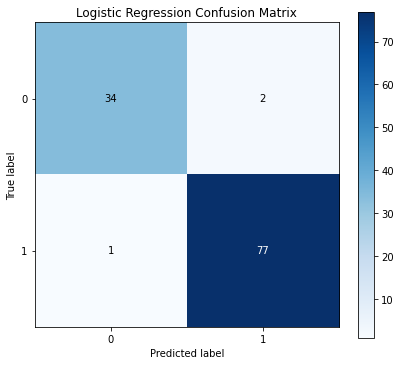

In [71]:
y_pred = log_clf.predict(x_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Logistic Regression Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

<AxesSubplot:title={'center':'Voting Ensemble Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

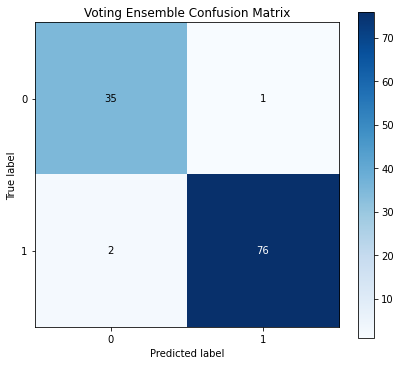

In [72]:
y_pred = voting_clf.predict(x_test)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(y_test, y_pred,
                                    title="Voting Ensemble Confusion Matrix",
                                    cmap="Blues",
                                    ax=ax1)

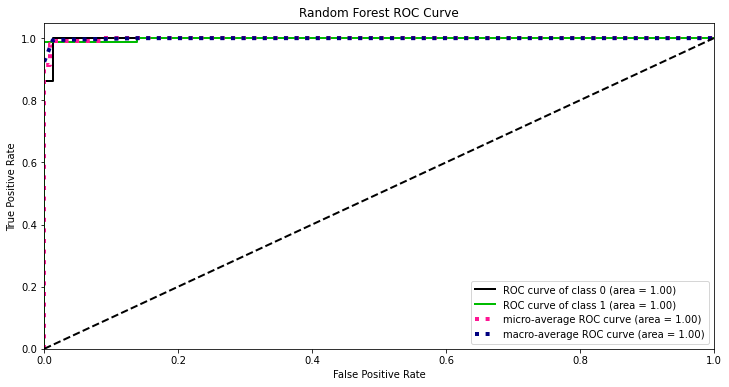

In [73]:
y_pred_prob = rnd_clf2.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob,
                       title="Random Forest ROC Curve", figsize=(12,6));

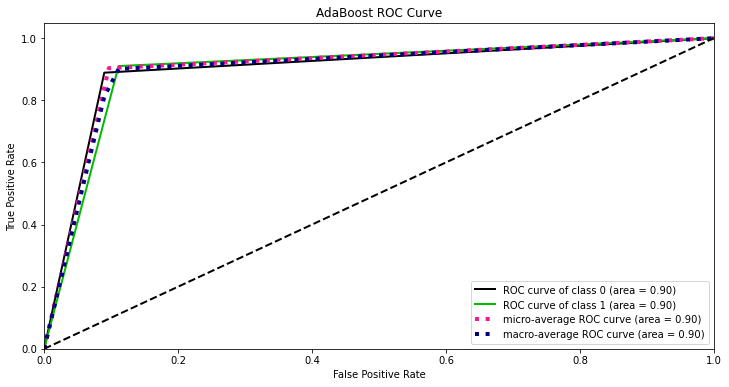

In [74]:
y_pred_prob = ada_clf.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob,
                       title="AdaBoost ROC Curve", figsize=(12,6));

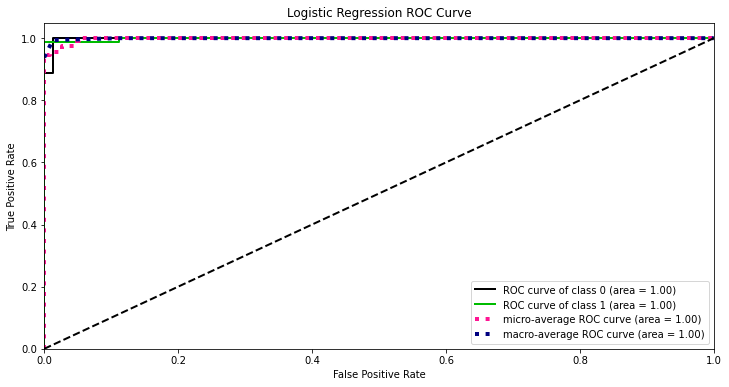

In [75]:
y_pred_prob = log_clf.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob,
                       title="Logistic Regression ROC Curve", figsize=(12,6));

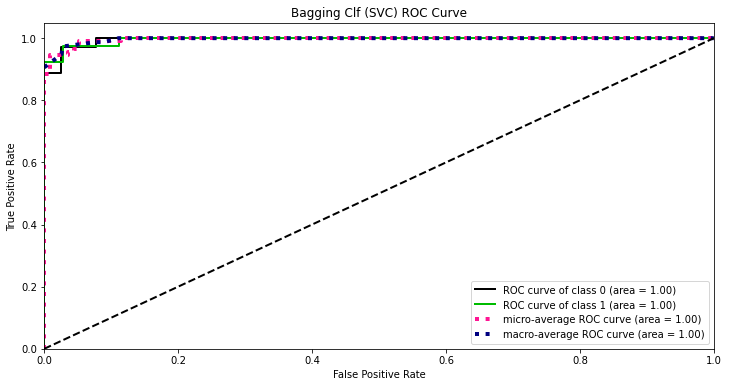

In [76]:
y_pred_prob = bag_clf.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob,
                       title="Bagging Clf (SVC) ROC Curve", figsize=(12,6));

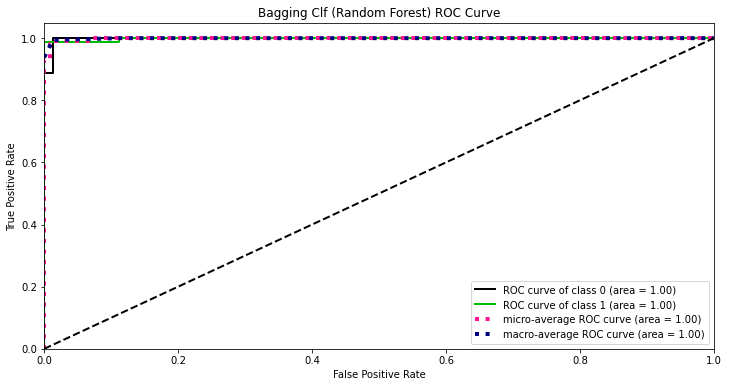

In [77]:
y_pred_prob = bag_clf_2.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob,
                       title="Bagging Clf (Random Forest) ROC Curve", figsize=(12,6));

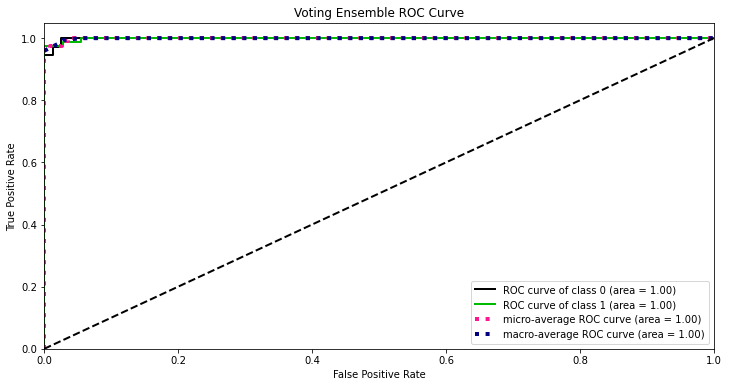

In [78]:
y_pred_prob = voting_clf.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, y_pred_prob,
                       title="Voting Ensemble ROC Curve", figsize=(12,6));

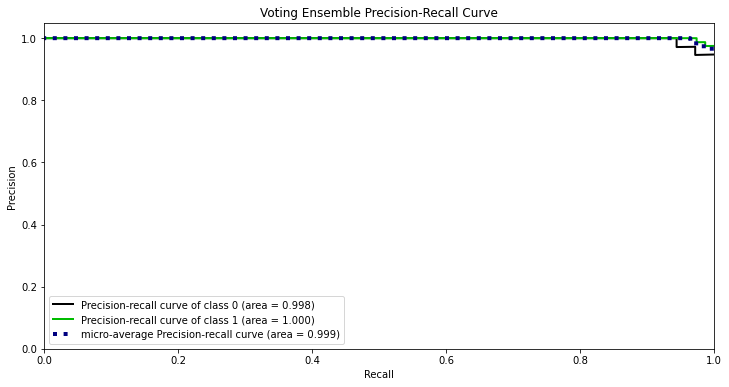

In [79]:
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_prob,
                       title="Voting Ensemble Precision-Recall Curve", figsize=(12,6));